In [40]:
from gensim.models import KeyedVectors

In [41]:
zh_model = KeyedVectors.load_word2vec_format('zh.vec')

In [42]:
words = []
for word in zh_model.key_to_index:
    words.append(word)

In [92]:
from opencc import OpenCC

cc = OpenCC('t2s')
text = '投票當天需攜帶投票通知單、國民身分證及印章，若沒有收到投票通知書，可以向戶籍所在地鄰長查詢投票所，印章則是可以用簽名代替，至於身分證則是一定要攜帶。'

print(cc.convert(text))

ModuleNotFoundError: No module named 'opencc'

In [43]:
print("單詞總數： {}".format(len(words)))

预训练模型包含单词总数： 50102


In [44]:
words[:10]

['的', '</s>', '在', '是', '年', '和', '了', '於', '為', '有']

In [45]:
words[-10:]

['伏爾加河', '买办', '由九龍', '杨虎城', '肯恩', '千岁', '任至', '专权', '应答', '休战']

In [46]:
words[0]

'的'

In [47]:
print("词向量维度: {}".format(
    len(zh_model[words[0]])
))

词向量维度: 300


In [48]:
print("单词“{}”的向量表示: {}".format(
    words[0], zh_model[words[0]]
))

单词“的”的向量表示: [ 8.6988e-02  9.1123e-02  3.0722e-02  3.4160e-03  2.7568e-02  5.4995e-03
  1.0905e-01  4.9999e-02 -1.9161e-01  4.2729e-02  1.3284e-01 -4.2997e-02
  4.4196e-02 -4.6042e-02  5.2395e-02 -1.3002e-01  1.1440e-01 -1.5359e-01
  5.7565e-02  1.3344e-01 -6.4197e-02  5.3679e-02  1.3349e-01  6.1268e-02
 -2.4911e-03  1.9382e-01  4.4253e-02 -2.0858e-02 -8.0714e-02  1.0053e-01
  5.8553e-02  6.3155e-02 -2.9961e-02 -3.1906e-02  5.6153e-02  5.1014e-02
  1.0752e-01 -7.4407e-02  9.1990e-02  1.7744e-01 -5.9959e-02  1.4046e-01
 -8.0201e-02  4.3989e-02 -9.5205e-02  1.3022e-02  9.1900e-02  2.4317e-02
 -7.0992e-02 -1.5179e-01 -3.0031e-02  1.0344e-01 -5.8155e-02  3.5950e-02
 -5.5085e-02  4.7587e-02 -1.4251e-01 -1.3986e-01 -1.3891e-01  6.9042e-03
  9.0945e-02 -5.5156e-02  6.8180e-02  1.1948e-01  7.8577e-03  1.0014e-01
 -4.2805e-02  2.2362e-01 -2.6212e-02 -3.5302e-02 -6.2687e-03 -1.0843e-01
  1.0872e-01  2.8890e-02 -3.5473e-03 -1.9498e-01 -7.5138e-02  8.5332e-03
 -1.0061e-01 -1.7855e-02 -1.5515e-01  5

In [49]:
find_similar_to = '研究生'

In [50]:
for similar_word in zh_model.similar_by_word(find_similar_to, topn=5):
    print("Word: {0}, Similarity: {1:.2f}".format(
        similar_word[0], similar_word[1]
    ))

Word: 硕士, Similarity: 0.69
Word: 博士生, Similarity: 0.69
Word: 本科生, Similarity: 0.69
Word: 硕士生, Similarity: 0.67
Word: 研究生院, Similarity: 0.63


In [51]:
word_add = ['男人', '王后']
word_sub = ['国王']

In [52]:
for resultant_word in zh_model.most_similar(
    positive=word_add, negative=word_sub, topn=5
):
    print("Word : {0} , Similarity: {1:.2f}".format(
        resultant_word[0], resultant_word[1]
    ))

Word : 女人 , Similarity: 0.70
Word : 女孩 , Similarity: 0.52
Word : 丈夫 , Similarity: 0.52
Word : 她 , Similarity: 0.50
Word : 女性 , Similarity: 0.49


In [53]:
word_add = ['日本', '纽约']
word_sub = ['东京']

In [54]:
for resultant_word in zh_model.most_similar(
    positive=word_add, negative=word_sub, topn=5
):
    print("Word : {0} , Similarity: {1:.2f}".format(
        resultant_word[0], resultant_word[1]
    ))

Word : 美国 , Similarity: 0.55
Word : 美國 , Similarity: 0.54
Word : 紐約 , Similarity: 0.51
Word : 加拿大 , Similarity: 0.48
Word : 底特律 , Similarity: 0.48


In [55]:
word_add = ['日本', '巴黎']
word_sub = ['东京']

In [56]:
for resultant_word in zh_model.most_similar(
    positive=word_add, negative=word_sub, topn=5
):
    print("Word : {0} , Similarity: {1:.2f}".format(
        resultant_word[0], resultant_word[1]
    ))

Word : 法國 , Similarity: 0.61
Word : 大利 , Similarity: 0.48
Word : 歐洲 , Similarity: 0.46
Word : 德國 , Similarity: 0.46
Word : 意大利 , Similarity: 0.46


In [57]:
import numpy as np
from sklearn.manifold import TSNE

In [58]:
with open('data/議題一 男孩危機 【國中】.csv_20230225-17371677317867.txt') as f:
    data = f.read()

In [59]:
data[:100]

'\n---------------------------\n【觀察】我所看見的性別OO (如性別特質、性別之美、性別屏障......)，請仔細觀察身邊不同特質的人，與他/她分享並討論前頁的訊息，記錄自己'

In [60]:
data = data.replace('\n', '')

In [61]:
data[:100]

'---------------------------【觀察】我所看見的性別OO (如性別特質、性別之美、性別屏障......)，請仔細觀察身邊不同特質的人，與他/她分享並討論前頁的訊息，記錄自己與他'

In [62]:
import jieba

In [63]:
words = list(jieba.cut(data))

In [64]:
words[:10]

['---------------------------', '【', '觀察', '】', '我', '所', '看', '見', '的', '性別']

In [65]:
vector_dim = 300

In [66]:
vocabs = []
embedding = np.array([])

In [67]:
for word in words:
    if word in zh_model.key_to_index and not word in vocabs:
        vocabs.append(word)
        embedding = np.append(embedding, zh_model[word])

In [68]:
len(vocabs)

483

In [69]:
embedding = embedding.reshape(len(vocabs), vector_dim)

In [70]:
tsne = TSNE()

In [71]:
low_dim_embedding = tsne.fit_transform(embedding)

/Users/fifihsu/Documents/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/fifihsu/Documents/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [72]:
%matplotlib inline

In [73]:
import matplotlib
print(matplotlib.__file__)

/Users/fifihsu/Documents/anaconda3/lib/python3.9/site-packages/matplotlib/__init__.py


In [74]:
import matplotlib.font_manager
 
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
for i in a:
    print(i)

.Aqua Kana
.Arabic UI Display
.Arabic UI Text
.Helvetica Neue DeskInterface
.Keyboard
.New York
.New York
.SF Compact Display
.SF Compact Rounded
.SF Compact Text
.SF Compact Text
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Display Condensed
.SF NS Mono
.SF NS Mono
.SF NS Rounded
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
.SF NS Text Condensed
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial
Arial
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Narrow
Arial Narrow
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arial Unicode MS
Artifakt Element
Artifakt Element
Artifakt Element
Artifakt Elem

In [75]:
import myhelper

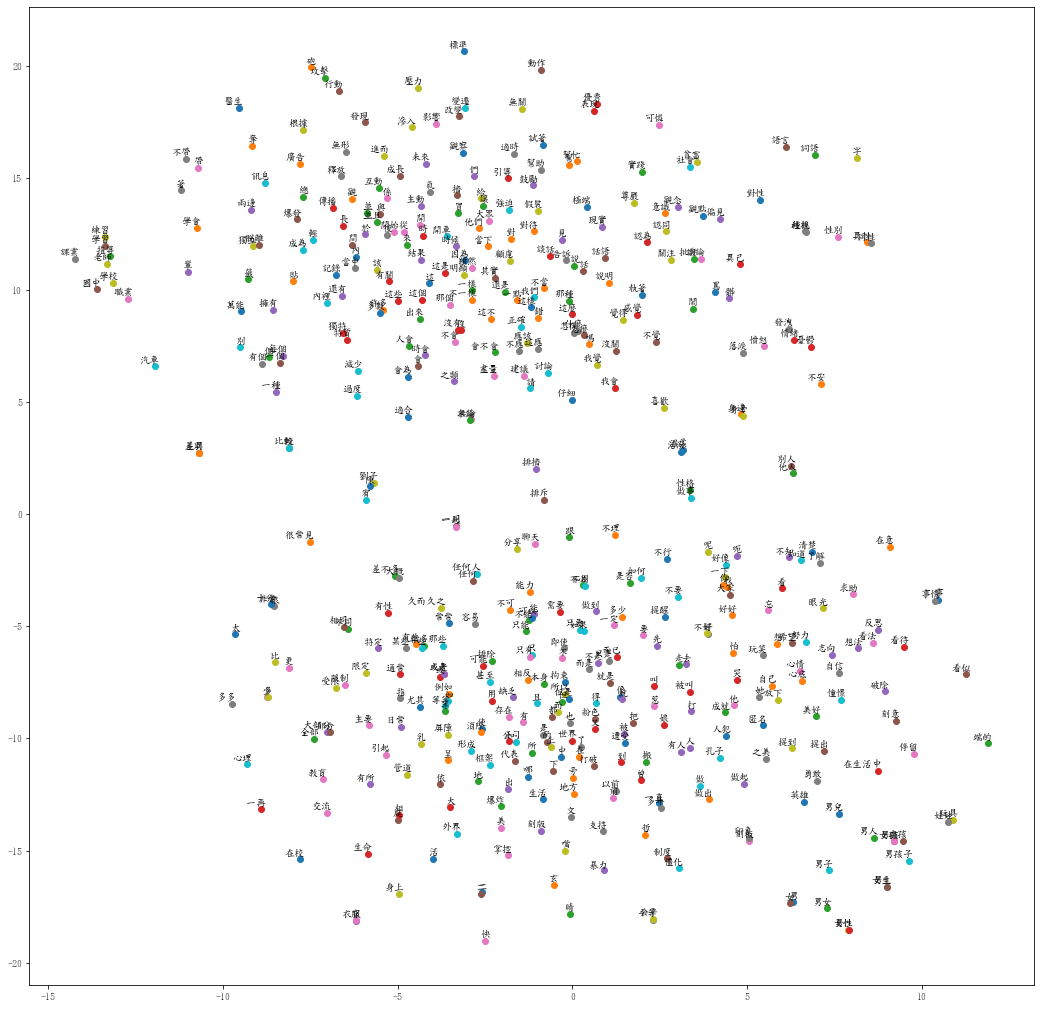

In [76]:
myhelper.plot_with_labels(low_dim_embedding, vocabs)